In [39]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

from run_utils import run_env_experiment, plot_ratings_mses, plot_ratings_mses_s3, plot_regret, plot_regret_s3
from env_defaults import TOPICS_STATIC_SMALL, TOPICS_DYNAMIC_SMALL, TOPICS_DYNAMIC, TOPICS_STATIC

sys.path.append('../') 
from reclab.environments import Topics
from reclab.environments import Engelhardt
from reclab.environments import LatentFactorBehavior
from reclab.recommenders import LibFM
from reclab.recommenders import KNNRecommender
from reclab.recommenders import TopPop
from reclab.recommenders import Autorec
from reclab.recommenders import Llorma
from reclab.recommenders import EASE
from reclab.recommenders import PerfectRec
from reclab.recommenders import RandomRec


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
## Key Parameters across all settings
bucket_name = 'recsys-eval'
data_dir = 'master'
topics = True

num_users = 100
num_items = 170
num_init_ratings = 1000
rating_frequency = 0.2
recommender_names = ['LibFM (MCMC)', 'LibFM (SGD)', 'Autorec',
                     'UserKnn', 'ItemKnn', 'EASE', 'TopPop',
                     'RandomRec', 'PerfectRec']
n_trials = 10
trial_seeds = [i for i in range(n_trials)]
recommenders = [
    LibFM(
        num_user_features=0,
        num_item_features=0,
        num_rating_features=0,
        max_num_users=num_users,
        max_num_items=num_items,
        method='mcmc',
        num_iter=200,
        num_two_way_factors=20,
        init_stdev=1.0,
    ),
    LibFM(
        num_user_features=0,
        num_item_features=0,
        num_rating_features=0,
        max_num_users=num_users,
        max_num_items=num_items,
        method='sgd',
        num_iter=200,
        reg=0.07,
        learning_rate=0.01,
        num_two_way_factors=20,
        init_stdev=1.0,
    ),
    Autorec(
        num_users=num_users,
        num_items=num_items,
        hidden_neuron=500,
        base_lr=1e-2,
        train_epoch=200
    ),
    KNNRecommender(
        shrinkage=0,
        neighborhood_size=num_users,
        user_based=True
    ),
    KNNRecommender(
        shrinkage=0,
        neighborhood_size=num_items,
        user_based=False
    ),
    EASE(lam=5889),
    TopPop(),
    RandomRec(),
]

In [3]:
## Key Parameters across all settings
bucket_name = 'recsys-eval'
data_dir = 'master'
topics = True

num_users = 100
num_items = 170
num_init_ratings = 1000
rating_frequency = 0.2
recommender_names = ['LibFM (MCMC)', 'LibFM (SGD)', 'Autorec',
                     'UserKnn', 'ItemKnn', 'EASE', 'TopPop',
                     'RandomRec', 'PerfectRec']
n_trials = 10
trial_seeds = [i for i in range(n_trials)]
recommenders = [
    LibFM(
        num_user_features=0,
        num_item_features=0,
        num_rating_features=0,
        max_num_users=num_users,
        max_num_items=num_items,
        method='mcmc',
        num_iter=200,
        num_two_way_factors=20,
        init_stdev=1.0,
    ),
    LibFM(
        num_user_features=0,
        num_item_features=0,
        num_rating_features=0,
        max_num_users=num_users,
        max_num_items=num_items,
        method='sgd',
        num_iter=200,
        reg=0.07,
        learning_rate=0.01,
        num_two_way_factors=20,
        init_stdev=1.0,
    ),
    Autorec(
        num_users=num_users,
        num_items=num_items,
        hidden_neuron=500,
        base_lr=1e-2,
        train_epoch=200
    ),
    KNNRecommender(
        shrinkage=0,
        neighborhood_size=num_users,
        user_based=True
    ),
    KNNRecommender(
        shrinkage=0,
        neighborhood_size=num_items,
        user_based=False
    ),
    EASE(lam=5889),
    TopPop(),
    RandomRec(),
]

In [30]:
env = Topics(**TOPICS_STATIC_SMALL['params'], **TOPICS_STATIC_SMALL['optional_params'])
environment_names = [TOPICS_STATIC_SMALL['name']]
ratings, preds, dense_ratings, dense_preds = run_env_experiment(environments=[env],
                                                                recommenders=recommenders + [PerfectRec(lambda x, y: env.dense_ratings[x, y])],
                                                                trial_seeds=trial_seeds,
                                                                len_trial=50,
                                                                environment_names=environment_names,
                                                                recommender_names=recommender_names,
                                                                bucket_name=bucket_name,
                                                                data_dir=data_dir,
                                                                overwrite=False)

Started experiments on environment: topics_static_small
	Initial density: 5.88235294117647%, Final density: 11.76470588235294%, Good item density: 28.135294117647057%
Running trials for recommender: LibFM (MCMC)
Running trial with seed: 0
Loading past results from S3 at directory: master/topics_static_small/LibFM (MCMC)/trials/seed_0/
Loading master/topics_static_small/LibFM (MCMC)/trials/seed_0/
Running trial with seed: 1
Loading past results from S3 at directory: master/topics_static_small/LibFM (MCMC)/trials/seed_1/
Loading master/topics_static_small/LibFM (MCMC)/trials/seed_1/
Running trial with seed: 2
Loading past results from S3 at directory: master/topics_static_small/LibFM (MCMC)/trials/seed_2/
Loading master/topics_static_small/LibFM (MCMC)/trials/seed_2/
Running trial with seed: 3
Loading past results from S3 at directory: master/topics_static_small/LibFM (MCMC)/trials/seed_3/
Loading master/topics_static_small/LibFM (MCMC)/trials/seed_3/
Running trial with seed: 4
Loading p

Running trial with seed: 3
Loading past results from S3 at directory: master/topics_static_small/ItemKnn/trials/seed_3/
Loading master/topics_static_small/ItemKnn/trials/seed_3/
Running trial with seed: 4
Loading past results from S3 at directory: master/topics_static_small/ItemKnn/trials/seed_4/
Loading master/topics_static_small/ItemKnn/trials/seed_4/
Running trial with seed: 5
Loading past results from S3 at directory: master/topics_static_small/ItemKnn/trials/seed_5/
Loading master/topics_static_small/ItemKnn/trials/seed_5/
Running trial with seed: 6
Loading past results from S3 at directory: master/topics_static_small/ItemKnn/trials/seed_6/
Loading master/topics_static_small/ItemKnn/trials/seed_6/
Running trial with seed: 7
Loading past results from S3 at directory: master/topics_static_small/ItemKnn/trials/seed_7/
Loading master/topics_static_small/ItemKnn/trials/seed_7/
Running trial with seed: 8
Loading past results from S3 at directory: master/topics_static_small/ItemKnn/trial

Running trial with seed: 9
Loading past results from S3 at directory: master/topics_static_small/PerfectRec/trials/seed_9/
Loading master/topics_static_small/PerfectRec/trials/seed_9/


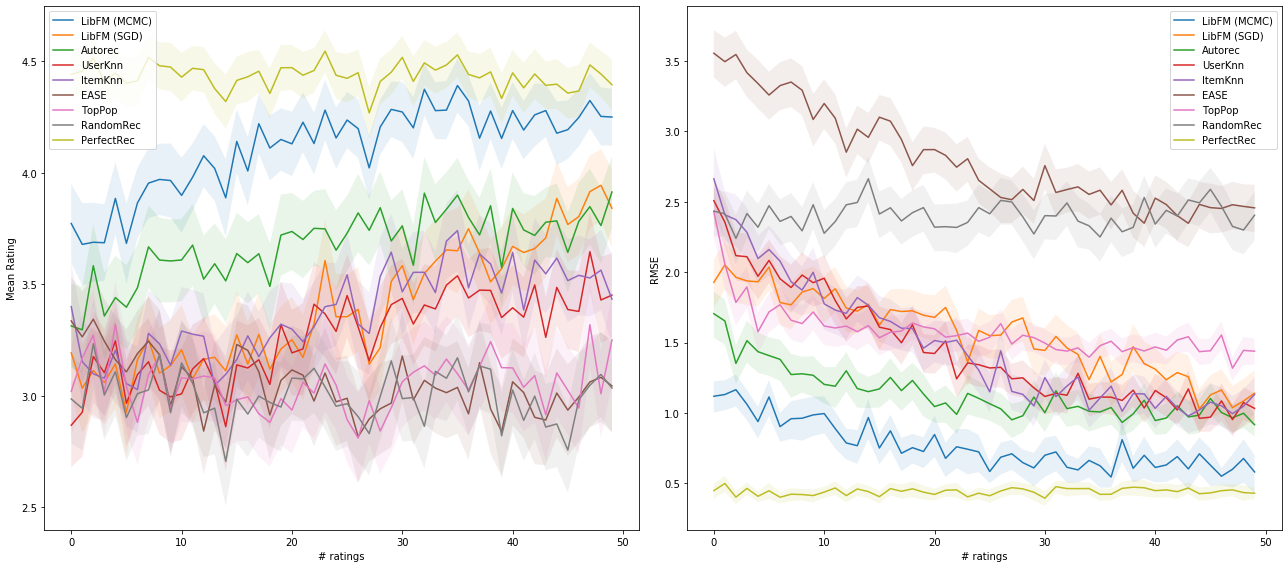

/home/ec2-user/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


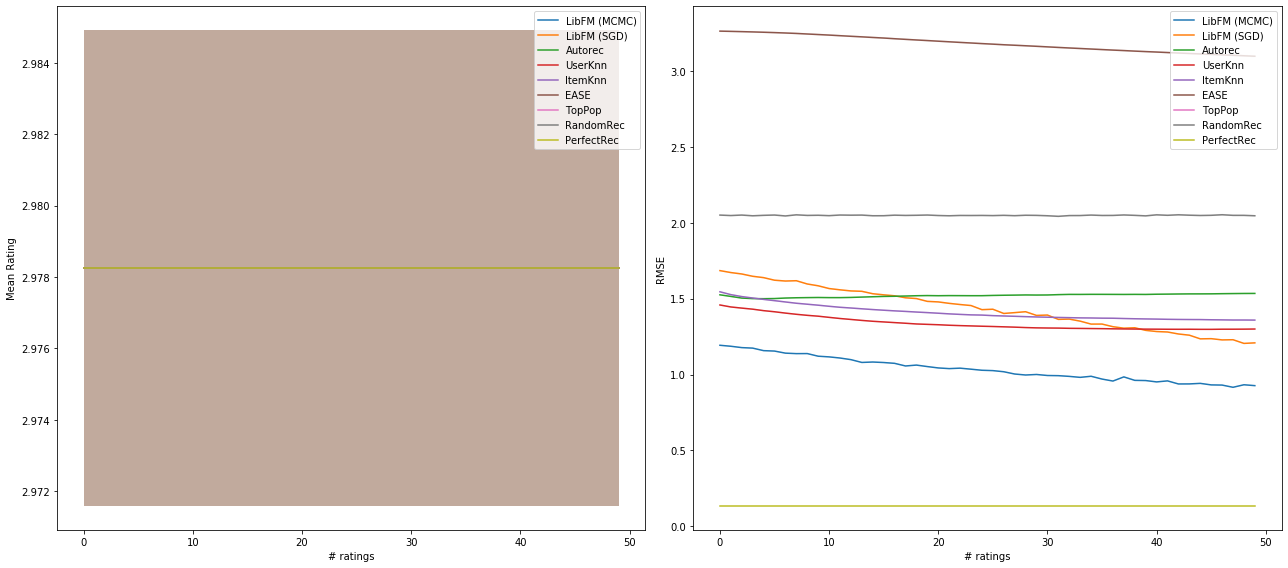

In [31]:
plot_ratings_mses(ratings[0], preds[0], recommender_names)
plot_ratings_mses(dense_ratings[0], dense_preds[0], recommender_names)

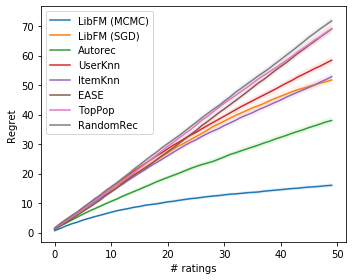

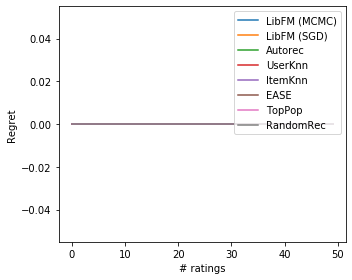

In [33]:
plot_regret(ratings[0], recommender_names)
plot_regret(dense_ratings[0], recommender_names)

In [34]:
env = Topics(**TOPICS_DYNAMIC_SMALL['params'], **TOPICS_DYNAMIC_SMALL['optional_params'])
environment_names = [TOPICS_DYNAMIC_SMALL['name']]
ratings, preds, dense_ratings, dense_preds = run_env_experiment(environments=[env],
                                                                recommenders=recommenders + [PerfectRec(lambda x, y: env.dense_ratings[x, y])],
                                                                trial_seeds=trial_seeds,
                                                                len_trial=50,
                                                                environment_names=environment_names,
                                                                recommender_names=recommender_names,
                                                                bucket_name=bucket_name,
                                                                data_dir=data_dir,
                                                                overwrite=False)

Started experiments on environment: topics_dynamic_small
	Initial density: 5.88235294117647%, Final density: 11.76470588235294%, Good item density: 29.064705882352943%
Running trials for recommender: LibFM (MCMC)
Running trial with seed: 0
Loading past results from S3 at directory: master/topics_dynamic_small/LibFM (MCMC)/trials/seed_0/
Loading master/topics_dynamic_small/LibFM (MCMC)/trials/seed_0/
Running trial with seed: 1
Loading past results from S3 at directory: master/topics_dynamic_small/LibFM (MCMC)/trials/seed_1/
Loading master/topics_dynamic_small/LibFM (MCMC)/trials/seed_1/
Running trial with seed: 2
Loading past results from S3 at directory: master/topics_dynamic_small/LibFM (MCMC)/trials/seed_2/
Loading master/topics_dynamic_small/LibFM (MCMC)/trials/seed_2/
Running trial with seed: 3
Loading past results from S3 at directory: master/topics_dynamic_small/LibFM (MCMC)/trials/seed_3/
Loading master/topics_dynamic_small/LibFM (MCMC)/trials/seed_3/
Running trial with seed: 4


Running trial with seed: 3
Loading past results from S3 at directory: master/topics_dynamic_small/ItemKnn/trials/seed_3/
Loading master/topics_dynamic_small/ItemKnn/trials/seed_3/
Running trial with seed: 4
Loading past results from S3 at directory: master/topics_dynamic_small/ItemKnn/trials/seed_4/
Loading master/topics_dynamic_small/ItemKnn/trials/seed_4/
Running trial with seed: 5
Loading past results from S3 at directory: master/topics_dynamic_small/ItemKnn/trials/seed_5/
Loading master/topics_dynamic_small/ItemKnn/trials/seed_5/
Running trial with seed: 6
Loading past results from S3 at directory: master/topics_dynamic_small/ItemKnn/trials/seed_6/
Loading master/topics_dynamic_small/ItemKnn/trials/seed_6/
Running trial with seed: 7
Loading past results from S3 at directory: master/topics_dynamic_small/ItemKnn/trials/seed_7/
Loading master/topics_dynamic_small/ItemKnn/trials/seed_7/
Running trial with seed: 8
Loading past results from S3 at directory: master/topics_dynamic_small/It

Running trial with seed: 8
Loading past results from S3 at directory: master/topics_dynamic_small/PerfectRec/trials/seed_8/
Loading master/topics_dynamic_small/PerfectRec/trials/seed_8/
Running trial with seed: 9
Loading past results from S3 at directory: master/topics_dynamic_small/PerfectRec/trials/seed_9/
Loading master/topics_dynamic_small/PerfectRec/trials/seed_9/


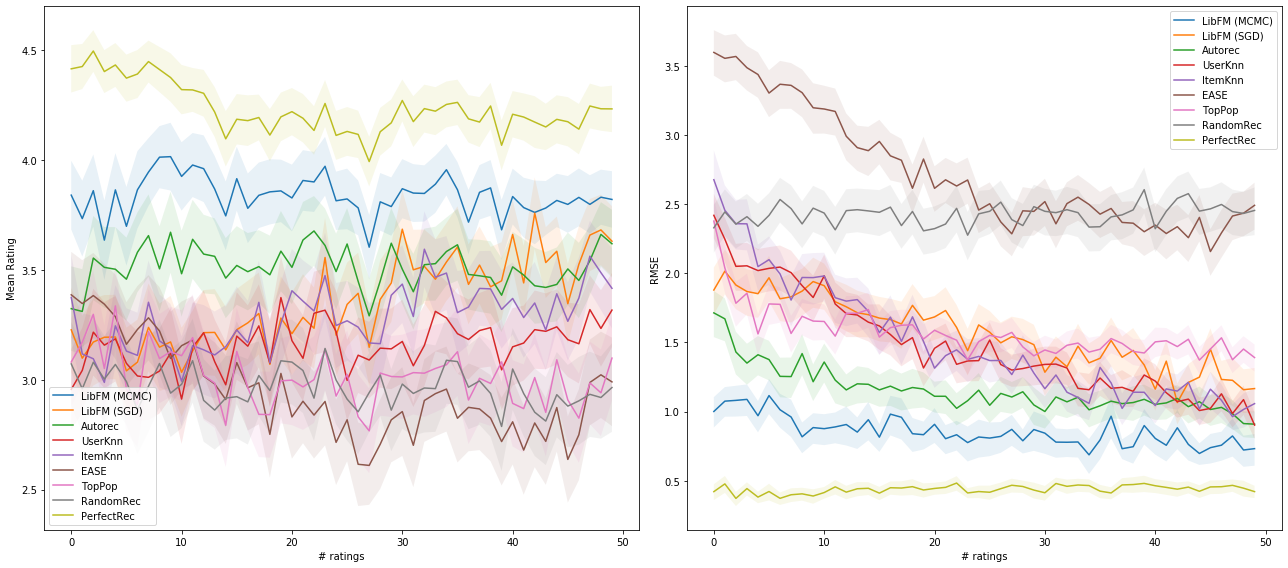

/home/ec2-user/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


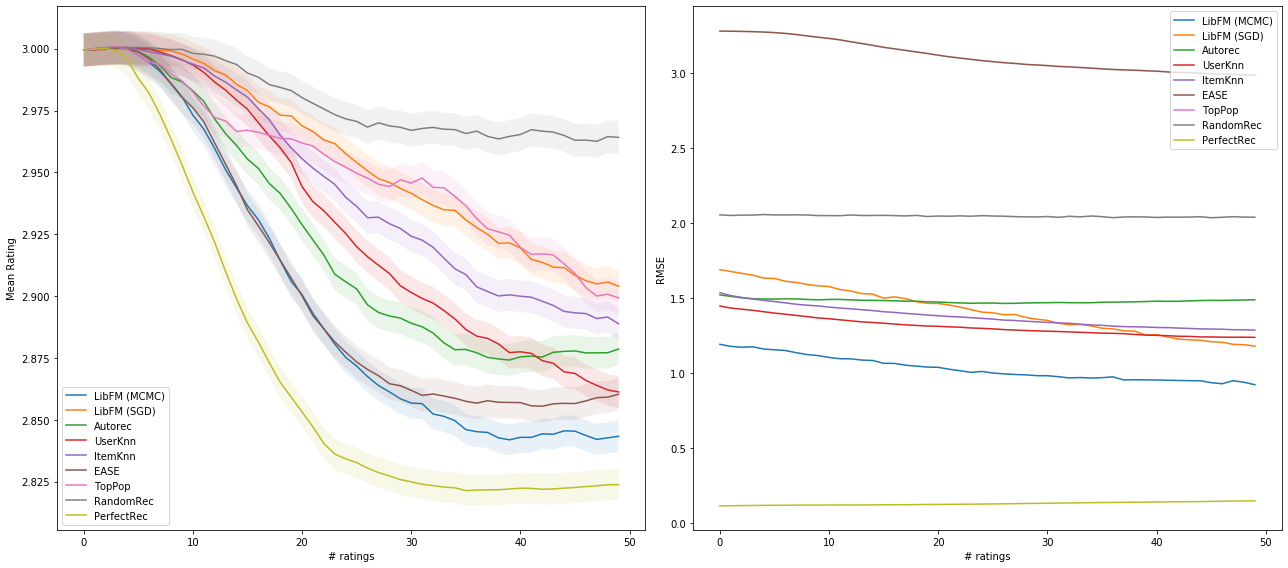

In [35]:
plot_ratings_mses(ratings[0], preds[0], recommender_names)
plot_ratings_mses(dense_ratings[0], dense_preds[0], recommender_names)

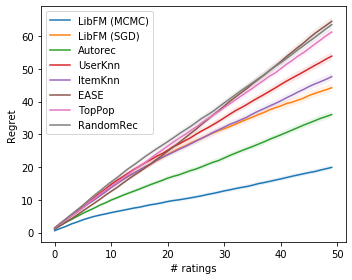

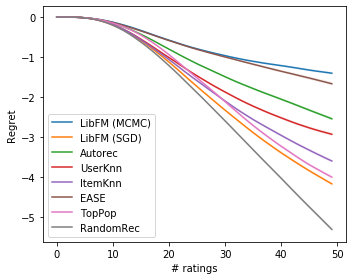

In [36]:
plot_regret(ratings[0], recommender_names)
plot_regret(dense_ratings[0], recommender_names)

Loading master/topics_dynamic/LibFM (MCMC)/trials/seed_0/
Loading master/topics_dynamic/LibFM (MCMC)/trials/seed_1/
Loading master/topics_dynamic/LibFM (MCMC)/trials/seed_2/
Loading master/topics_dynamic/UserKnn/trials/seed_0/
Loading master/topics_dynamic/UserKnn/trials/seed_1/
Loading master/topics_dynamic/UserKnn/trials/seed_2/
Loading master/topics_dynamic/ItemKnn/trials/seed_0/
Loading master/topics_dynamic/ItemKnn/trials/seed_1/
Loading master/topics_dynamic/ItemKnn/trials/seed_2/
Loading master/topics_dynamic/EASE/trials/seed_0/
Loading master/topics_dynamic/EASE/trials/seed_1/
Loading master/topics_dynamic/EASE/trials/seed_2/
Loading master/topics_dynamic/TopPop/trials/seed_0/
Loading master/topics_dynamic/TopPop/trials/seed_1/
Loading master/topics_dynamic/TopPop/trials/seed_2/
Loading master/topics_dynamic/RandomRec/trials/seed_0/
Loading master/topics_dynamic/RandomRec/trials/seed_1/
Loading master/topics_dynamic/RandomRec/trials/seed_2/
Loading master/topics_dynamic/Perfect

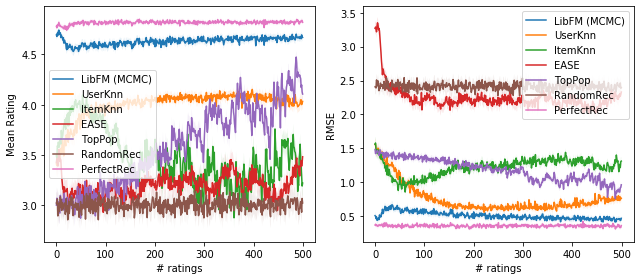

In [42]:
recommender_names = ['LibFM (MCMC)', 'UserKnn', 'ItemKnn',
                     'EASE', 'TopPop',
                     'RandomRec', 'PerfectRec']
env_name = TOPICS_DYNAMIC['name']
plot_ratings_mses_s3(recommender_names,
                     500,
                     bucket_name,
                     data_dir,
                     env_name,
                     [i for i in range(3)],
                     plot_dense=False)

Loading master/topics_dynamic/LibFM (MCMC)/trials/seed_0/
Loading master/topics_dynamic/LibFM (MCMC)/trials/seed_1/
Loading master/topics_dynamic/LibFM (MCMC)/trials/seed_2/
Loading master/topics_dynamic/UserKnn/trials/seed_0/
Loading master/topics_dynamic/UserKnn/trials/seed_1/
Loading master/topics_dynamic/UserKnn/trials/seed_2/
Loading master/topics_dynamic/ItemKnn/trials/seed_0/
Loading master/topics_dynamic/ItemKnn/trials/seed_1/
Loading master/topics_dynamic/ItemKnn/trials/seed_2/
Loading master/topics_dynamic/EASE/trials/seed_0/
Loading master/topics_dynamic/EASE/trials/seed_1/
Loading master/topics_dynamic/EASE/trials/seed_2/
Loading master/topics_dynamic/TopPop/trials/seed_0/
Loading master/topics_dynamic/TopPop/trials/seed_1/
Loading master/topics_dynamic/TopPop/trials/seed_2/
Loading master/topics_dynamic/RandomRec/trials/seed_0/
Loading master/topics_dynamic/RandomRec/trials/seed_1/
Loading master/topics_dynamic/RandomRec/trials/seed_2/
Loading master/topics_dynamic/Perfect

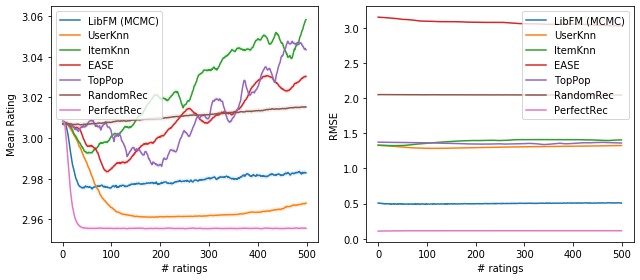

In [46]:
recommender_names = ['LibFM (MCMC)', 'UserKnn', 'ItemKnn',
                     'EASE', 'TopPop',
                     'RandomRec', 'PerfectRec']
env_name = TOPICS_DYNAMIC['name']
plot_ratings_mses_s3(recommender_names,
                     500,
                     bucket_name,
                     data_dir,
                     env_name,
                     [i for i in range(3)],
                     plot_dense=True)

Loading master/topics_static/LibFM (MCMC)/trials/seed_0/
Loading master/topics_static/LibFM (MCMC)/trials/seed_1/
Loading master/topics_static/LibFM (MCMC)/trials/seed_2/
Loading master/topics_static/LibFM (MCMC)/trials/seed_3/
Loading master/topics_static/LibFM (MCMC)/trials/seed_4/
Loading master/topics_static/LibFM (MCMC)/trials/seed_5/
Loading master/topics_static/LibFM (MCMC)/trials/seed_6/
Loading master/topics_static/LibFM (MCMC)/trials/seed_7/
Loading master/topics_static/LibFM (MCMC)/trials/seed_8/
Loading master/topics_static/LibFM (MCMC)/trials/seed_9/
Loading master/topics_static/UserKnn/trials/seed_0/
Loading master/topics_static/UserKnn/trials/seed_1/
Loading master/topics_static/UserKnn/trials/seed_2/
Loading master/topics_static/UserKnn/trials/seed_3/
Loading master/topics_static/UserKnn/trials/seed_4/
Loading master/topics_static/UserKnn/trials/seed_5/
Loading master/topics_static/UserKnn/trials/seed_6/
Loading master/topics_static/UserKnn/trials/seed_7/
Loading master

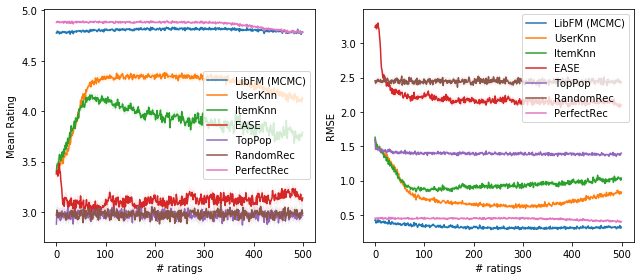

In [43]:
recommender_names = ['LibFM (MCMC)', 'UserKnn', 'ItemKnn',
                     'EASE', 'TopPop',
                     'RandomRec', 'PerfectRec']
env_name = TOPICS_STATIC['name']
plot_ratings_mses_s3(recommender_names,
                     500,
                     bucket_name,
                     data_dir,
                     env_name,
                     trial_seeds,
                     plot_dense=False)

Loading master/topics_static/LibFM (MCMC)/trials/seed_0/
Loading master/topics_static/LibFM (MCMC)/trials/seed_1/
Loading master/topics_static/LibFM (MCMC)/trials/seed_2/
Loading master/topics_static/LibFM (MCMC)/trials/seed_3/
Loading master/topics_static/LibFM (MCMC)/trials/seed_4/
Loading master/topics_static/LibFM (MCMC)/trials/seed_5/
Loading master/topics_static/LibFM (MCMC)/trials/seed_6/
Loading master/topics_static/LibFM (MCMC)/trials/seed_7/
Loading master/topics_static/LibFM (MCMC)/trials/seed_8/
Loading master/topics_static/LibFM (MCMC)/trials/seed_9/
Loading master/topics_static/UserKnn/trials/seed_0/
Loading master/topics_static/UserKnn/trials/seed_1/
Loading master/topics_static/UserKnn/trials/seed_2/
Loading master/topics_static/UserKnn/trials/seed_3/
Loading master/topics_static/UserKnn/trials/seed_4/
Loading master/topics_static/UserKnn/trials/seed_5/
Loading master/topics_static/UserKnn/trials/seed_6/
Loading master/topics_static/UserKnn/trials/seed_7/
Loading master

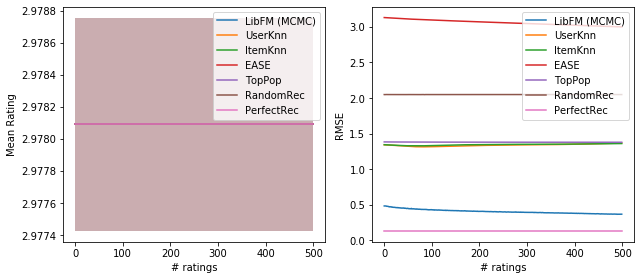

In [45]:
plot_ratings_mses_s3(recommender_names,
                     500,
                     bucket_name,
                     data_dir,
                     env_name,
                     trial_seeds,
                     plot_dense=True)